In [1]:
import sys
sys.path.append("C:\\Users\\cc_ca\\OneDrive\\Escritorio\\Desarrollo web\\Analisis de Datos\\Python\\Scripts\\.venv\\Lib\\site-packages")
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import gradio as gr
import matplotlib.pyplot as plt
import tempfile

c:\Users\cc_ca\OneDrive\Escritorio\Desarrollo web\Analisis de Datos\Python\Scripts\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Leemos el dataframe y obtenemos los 5 primeros valores
df_transacciones = pd.read_csv('..\\Data\\transacciones_banco_bogota.csv')

In [17]:
df_transacciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47032 entries, 0 to 47031
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   TIPOENTIDAD               47032 non-null  int64 
 1   CODIGOENTIDAD             47032 non-null  int64 
 2   NOMBREENTIDAD             47032 non-null  object
 3   FECHACORTE                47032 non-null  object
 4   NOMBRE_UNIDAD_DE_CAPTURA  47032 non-null  object
 5   COD_UNIDAD_CAPTURA        47032 non-null  int64 
 6   SUBCUENTA                 47032 non-null  int64 
 7   CONCEPTO                  47027 non-null  object
 8   TOTAL                     47032 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 3.2+ MB


In [18]:
total_elementos_por_columna = df_transacciones.shape[0]
valores_nulos_por_columna = df_transacciones.isna().sum()
porcentaje_vacios_por_columna = (valores_nulos_por_columna / total_elementos_por_columna) * 100
print("Porcentaje de valores vacíos por columna:")
print(porcentaje_vacios_por_columna)

Porcentaje de valores vacíos por columna:
TIPOENTIDAD                 0.000000
CODIGOENTIDAD               0.000000
NOMBREENTIDAD               0.000000
FECHACORTE                  0.000000
NOMBRE_UNIDAD_DE_CAPTURA    0.000000
COD_UNIDAD_CAPTURA          0.000000
SUBCUENTA                   0.000000
CONCEPTO                    0.010631
TOTAL                       0.000000
dtype: float64


In [3]:
# convertir columna 'FECHA_NACIMIENTO' al formato de fecha y hora de pandas
df_transacciones['FECHACORTE'] = pd.to_datetime(df_transacciones['FECHACORTE'], errors='coerce')
# obtener solo el año de nacimiento
df_transacciones['FECHACORTE'] = df_transacciones['FECHACORTE'].dt.year

C:\Users\cc_ca\AppData\Local\Temp\ipykernel_5536\674239770.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_transacciones['FECHACORTE'] = pd.to_datetime(df_transacciones['FECHACORTE'], errors='coerce')


In [20]:
df_transacciones['FECHACORTE'].value_counts().head(20)

FECHACORTE
2022    4006
2021    3890
2020    3859
2019    3836
2018    3218
2016    3126
2017    3126
2013    3122
2014    3119
2015    3099
2012    2993
2011    2874
2010    2779
2009    2682
2008    1303
Name: count, dtype: int64

In [21]:
df_transacciones['CONCEPTO'].value_counts().head(20)

CONCEPTO
Número total de transacciones                         7399
Monto total de transacciones                          7395
Número de operaciones por consulta de saldo           4790
Número de transacciones por pagos                     3661
Monto de transacciones por pagos                      3660
Monto de transacciones por transferencias             3267
Número de transacciones por transferencias            3266
Monto de transacciones por retiros                    2455
Número de transacciones por retiros                   2454
Número de transacciones por depósitos                 1589
Monto de transacciones por depósitos                  1584
Número de transacciones internacionales                924
Monto de transacciones internacionales                 892
Número de transacciones en cajeros internacionales     711
Monto de transacciones en cajeros internacionales      711
Monto de transacciones en POS internacionales          687
Número de transacciones en POS internacionales 

In [22]:
#Correlación

categorical_vars = ['NOMBREENTIDAD','NOMBRE_UNIDAD_DE_CAPTURA','CONCEPTO']

# Convertir todas las variables categóricas a cadenas de texto
df_transacciones[categorical_vars] = df_transacciones[categorical_vars].astype(str)
df_transacciones[categorical_vars]

,NOMBREENTIDAD,NOMBRE_UNIDAD_DE_CAPTURA,CONCEPTO
0,BANCO DE BOGOTA S. A.,OFICINAS,Número total de transacciones
1,BANCO DE BOGOTA S. A.,OFICINAS,Monto total de transacciones
2,BANCO DE BOGOTA S. A.,OFICINAS,Número de transacciones por pagos
3,BANCO DE BOGOTA S. A.,OFICINAS,Monto de transacciones por pagos
4,BANCO DE BOGOTA S. A.,OFICINAS,Número de transacciones por retiros
...,...,...,...
47027,Global Colombia 81 S.A.,INTERNET,Monto total de transacciones
47028,Global Colombia 81 S.A.,INTERNET,Número de transacciones por pagos
47029,Global Colombia 81 S.A.,INTERNET,Monto de transacciones por pagos
47030,Global Colombia 81 S.A.,INTERNET,Número de transacciones por transferencias


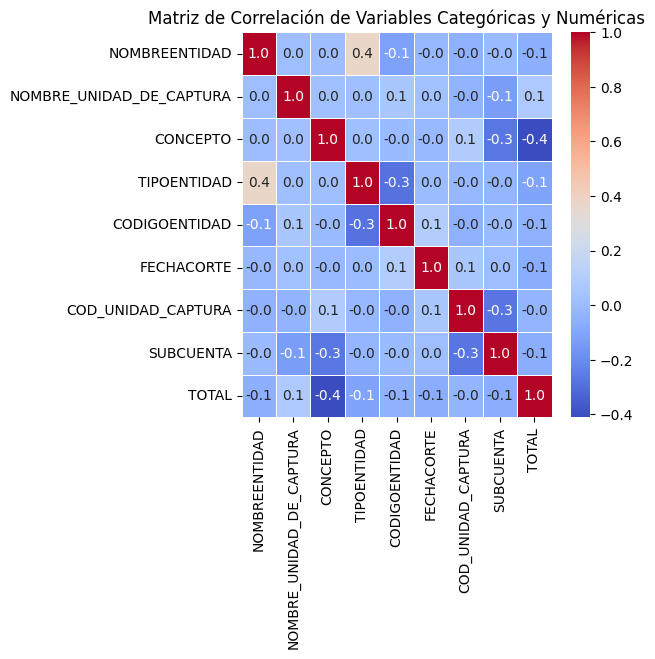

In [23]:
# Convertir variables categóricas a valores numéricos
label_encoder = LabelEncoder()
for var in categorical_vars:
    df_transacciones[var] = label_encoder.fit_transform(df_transacciones[var])

# Seleccionar variables numéricas
numeric_vars = ['TIPOENTIDAD', 'CODIGOENTIDAD', 'FECHACORTE', 'COD_UNIDAD_CAPTURA', 'SUBCUENTA', 'TOTAL' ]

# Calcular la matriz de correlación entre variables categóricas y numéricas
correlation_matrix = df_transacciones[categorical_vars + numeric_vars].corr(method='kendall')

# Configurar el tamaño de la figura
plt.figure(figsize=(5,5))

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)

# Añadir título
plt.title('Matriz de Correlación de Variables Categóricas y Numéricas')

# Mostrar el mapa de calor
plt.show()

In [4]:
#Agrupar el numero total de inscritos sacando null o 0 
#Regresion lineal total de personas vs fecha de registro
df_transacciones_agrupado = pd.DataFrame(df_transacciones)
df_transacciones_agrupado = df_transacciones[df_transacciones['CONCEPTO'] == 'Número total de transacciones']
cantidad_transacciones_año = df_transacciones_agrupado.groupby(df_transacciones['FECHACORTE']).size().reset_index(name = 'N_Total_Transacciones')
cantidad_transacciones_año

,FECHACORTE,N_Total_Transacciones
0,2008,211
1,2009,436
2,2010,453
3,2011,466
4,2012,487
5,2013,509
6,2014,505
7,2015,500
8,2016,504
9,2017,497


In [5]:
cantidad_transacciones_año['N_Total_Transacciones'].sum()

7399

In [6]:
# Seleccionar las variables de interés
X = cantidad_transacciones_año[['FECHACORTE']]  # Variable independiente
y = cantidad_transacciones_año['N_Total_Transacciones']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Función para hacer predicciones y mostrar la gráfica
def predict_and_plot(total):
    # Realizar la predicción
    fecha_corte_predicha = model.predict([[total]])[0]
    
    # Crear la gráfica
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
    y_pred = model.predict(X_test)
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de regresión')
    plt.scatter(total, fecha_corte_predicha, color='yellow', label='Predicción')
    plt.title('Regresión Lineal Simple con Predicción')
    plt.xlabel('Total N_Transacciones')
    plt.ylabel('Fecha de corte')
    plt.legend()
    
    # Guardar la gráfica en un archivo temporal
    tmpfile = tempfile.NamedTemporaryFile(suffix='.png', delete=False)
    plt.savefig(tmpfile.name)
    plt.close()  # Cerramos la figura para evitar duplicados en Gradio
    
    return fecha_corte_predicha, tmpfile.name

In [9]:
# Crear la interfaz de Gradio
inputs = gr.Slider(minimum=2008, maximum=2030, step=1, label="Año a predecir")
outputs = [gr.Textbox(label="Total de transacciones predichas"), gr.Image(label="Gráfica de Regresión")]

iface = gr.Interface(fn=predict_and_plot, inputs=inputs, outputs=outputs, live=True)

# Iniciar la interfaz
iface.launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


c:\Users\cc_ca\OneDrive\Escritorio\Desarrollo web\Analisis de Datos\Python\Scripts\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
